## X.8.12

Решить систему дифференциальных уравнений
u′ = 998u + 1998v,
v′= –999u – 1999v
с начальными значениями u(0) = v(0) = 1 на отрезке интегрирования [0, 10]
двумя методами второго порядка аппроксимации:
а) методом трапеций,
б) схемой CROS.
Проделать вычисления при следующих шагах интегрирования:
h = 10–4
, 10–3
, 2.5∙10–3
, 5∙10–3
, 10–2
.
Решения сравнить между собой и с точным решением. Объяснить поведение
метода трапеций при увеличении шага интегрирования. 

In [43]:
from math import exp
import numpy as np
from matplotlib import pyplot as plt

In [11]:
A = np.array([[998,  1998] ,[-999,-1999]])
h = [10**(-4), 10**(-3), 2.5*10**-3, 5*10**(-3), 10**-2]

Найдем точное решение системы:

$\begin{cases}
u′ = 998u + 1998v\\
v′= –999u – 1999v
\end{cases}$

С начальными условиями:

$\begin{cases}
u(0) = 1\\
v(0) = 1
\end{cases}$

$u(t) = -3e^{-1000t}+4e^{-t}\\
v(t) = 3e^{-1000t}+2e^{-t}$

In [149]:
def exact_solution(t):
    return [-3*(exp(-1000*t))+4*(exp(-t)), 3*(exp(-1000*t))-2*(exp(-t))]

### Метод трапеций

In [177]:
def trapeze_method(A, vect, h, t_0 = 0.0, t_n = 10.0):
    t = t_0
    
    res = np.array([[0,0]])
    y_np = np.array([0,0])
    y_n = np.array(vect)
    C = np.eye(2) - A.dot(h/2)

    while t < t_n:
        t += h
        b = y_n + np.dot(A.dot(y_n), h/2)
        y_np = np.linalg.solve(C, b)
        y_n = y_np
        res = np.append(res, [y_n], axis=0)
        
    return res[1:]

### CROS Метод

In [176]:
def cros_method(A, vect, h, t_0 = 0.0, t_n = 10.0):
        t = t_0
        
        res = np.array([[0,0]])
        solution = np.array(vect)
        E = np.eye(2)
        
        while t < t_n:
            t  += h
            X = np.linalg.solve(np.add(E, -h*complex(1/2, 1/2 )*A) , A.dot(solution) )
            solution = np.add(solution, h*(X.real))
            res = np.append(res, [solution], axis=0)
            
        return res[1:]

In [40]:
def get_acc(vect, t):
    return (abs(vect[0]-exact_solution(t)[0]) + abs(vect[1]-exact_solution(t)[1]))/(abs(exact_solution(t)[0]) + abs(exact_solution(t)[1]))

### Посмотрим на графики решений, полученных при помощи метода трапеций, сравним с точными решениями

In [178]:
y = trapeze_method(A, (1,1), 0.1)
x = np.linspace(0,10, num=101)
y_exact = np.array([exact_solution(i) for i in x])

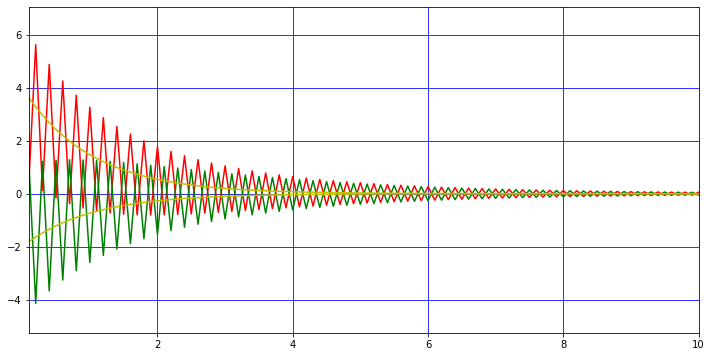

In [179]:
plt.figure(figsize=(12,6))
plt.grid(True, color='b')
plt.plot(np.array(x),y[:,0], color='r')
plt.plot(np.array(x),y[:,1], color='g')
plt.plot(np.array(x),y_exact[:,0], color='y')
plt.plot(np.array(x),y_exact[:,1], color='y')
plt.xlim(0.1,10)
plt.show()

Увеличим область неустойчивости

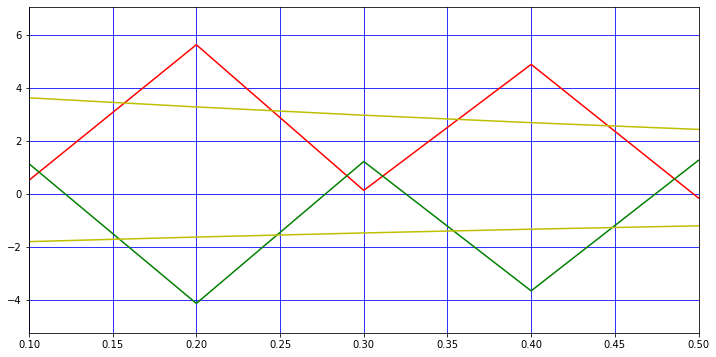

In [180]:
plt.figure(figsize=(12,6))
plt.grid(True, color='b')
plt.plot(np.array(x),y[:,0], color='r')
plt.plot(np.array(x),y[:,1], color='g')
plt.plot(np.array(x),y_exact[:,0], color='y')
plt.plot(np.array(x),y_exact[:,1], color='y')
plt.xlim((0.1,0.5))
plt.show()

### Посмотрим на графики решений, полученных при помощи метода CROS, сравним с точными решениями

In [181]:
y = cros_method(A, (1,1), 0.1)
x = np.linspace(0,10, num=101)
y_exact = np.array([exact_solution(i) for i in x])

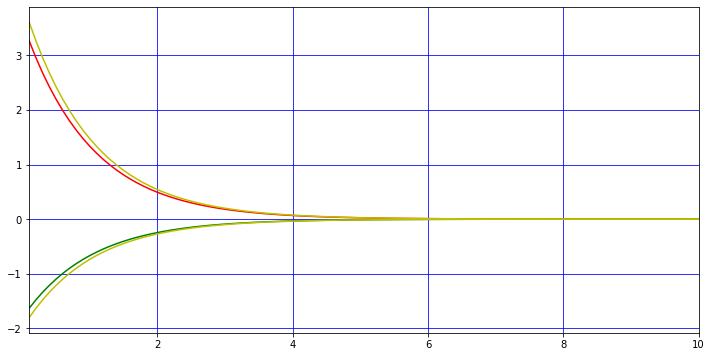

In [182]:
plt.figure(figsize=(12,6))
plt.grid(True, color='b')
plt.plot(np.array(x),y[:,0], color='r')
plt.plot(np.array(x),y[:,1], color='g')
plt.plot(np.array(x),y_exact[:,0], color='y')
plt.plot(np.array(x),y_exact[:,1], color='y')
plt.xlim(0.1,10)
plt.show()

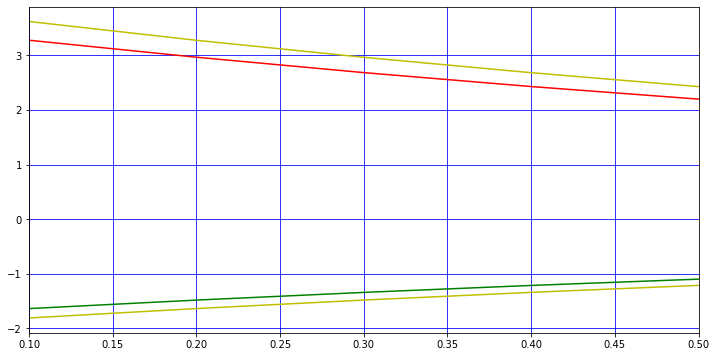

In [183]:
plt.figure(figsize=(12,6))
plt.grid(True, color='b')
plt.plot(np.array(x),y[:,0], color='r')
plt.plot(np.array(x),y[:,1], color='g')
plt.plot(np.array(x),y_exact[:,0], color='y')
plt.plot(np.array(x),y_exact[:,1], color='y')
plt.xlim((0.1,0.5))
plt.show()

### Теперь рассмотрим погрешности на последних точках и сравним их для двух методов с различными шагами.

In [184]:
for i in h:
    print("trapeze, h = ", i, 'Accuracy = ',  get_acc(trapeze_method(A, (1,1), i)[-1,:], 10))
    print("CROS, h = ", i, 'Accuracy = ', get_acc(cros_method(A, (1,1),i)[-1,:],10))

trapeze, h =  0.0001 Accuracy =  0.00010000333362672824
CROS, h =  0.0001 Accuracy =  9.997833632495776e-05
trapeze, h =  0.001 Accuracy =  0.0010003327502180804
CROS, h =  0.001 Accuracy =  0.0009978362463000413
trapeze, h =  0.0025 Accuracy =  5.2083237137297796e-06
CROS, h =  0.0025 Accuracy =  1.0397208984900193e-05
trapeze, h =  0.005 Accuracy =  2.0833193389220228e-05
CROS, h =  0.005 Accuracy =  4.151159080221589e-05
trapeze, h =  0.01 Accuracy =  0.01003275070151603
CROS, h =  0.01 Accuracy =  0.009786213207733428


Хотя метод CROS и исполняется дольше, но зато этот метод дает более точный результат. В методе CROS ошибка постепенно уменьшается, не меняя знак. В то время как для метода трапеций ошибка меняет знак, но по модулю равномерно стремися к нулю.